<a href="https://colab.research.google.com/github/belogabriel/pandas_lib/blob/main/case2_varejo_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OBJETIVO:**
1. DEPARTAMENTOS MAIS VENDIDOS;

2. MÉDIA DE PREÇO COM FRETE POR NOME DE DEPARTAMENTO;

3. QUANTIDADE DE VENDAS MENSAIS;

4. MÉDIA DE RENDA PARA CAA TIPO DE CANAL DE VENDA;

5. MÉDIA DE IDADE DE CLIENTES POR BANDEIRA.

## **PREMISSAS DE NEGÓCIO:**

- UM ERRO DE SISTEMA, PARA COMPRAS SEM UF CONSIDERE O ESTADO DO MS

- PREÇO NÃO PODE SER MAIOR QUE PREÇO COM FRETE

In [1]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [3]:
clientes = pd.read_excel('cliente_varejo.xlsx')
varejo = pd.read_excel('varejo.xlsx')

In [4]:
varejo.head(7)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742
6,464255,Internet,A,2023-01-02,599.200,599.200,Eletrodomesticos,SP,5604


In [5]:
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [6]:
varejo.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [7]:
varejo["idcanalvenda"] = varejo["idcanalvenda"].str.replace("APP","Aplicativo")
varejo.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [8]:
varejo['Nome_Departamento'] = varejo['Nome_Departamento'].str.replace(" ","_") #boa pratica, substituir espaços  por _
varejo['Nome_Departamento'] = varejo['Nome_Departamento'].str.replace(",","") #percebi que havia um ou mais itens com o caractere especial "," logo, removi.
varejo.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama_Mesa_e_Banho           153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [9]:
# varejo[varejo["estado"].isnull()]
# varejo_not_null = varejo.dropna()
# varejo_not_null.info()
varejo["estado"].fillna("MS", inplace=True) #resolvendo o erro do sistema, substituindo o null por "MS".
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [10]:
mean_price = varejo["Preço"].mean()
varejo["Preço"].fillna(mean_price, inplace=True) # subst. null por média dos preços.
print("a média de preços é:", mean_price)
print("------------------------------------")
print(varejo.info()) # tratamento de nulos concluído.

a média de preços é: 906.5891285439033
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB
None


In [11]:
varejo[["Preço","Preço_com_frete"]].describe()
wprice = varejo.query("Preço > Preço_com_frete")
rprice = varejo.query("Preço < Preço_com_frete")
rprice.describe()


,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [12]:
# rprice.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)
round(rprice.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2) #MÉDIA DE PREÇO COM FRETE PARA CADA DEPARTAMENTO.

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [13]:
# rprice.groupby("Data").idcompra.nunique().sort_values(ascending=False)
rprice['month'] = rprice["Data"].dt.month
# rprice = rprice.drop("mes", axis=1)
# pd.DataFrame(rprice.groupby("month")['idcompra'].agg("count").sort_values(ascending=False)) # teste
rprice.groupby("month").idcompra.nunique().sort_values(ascending=False) # VENDAS POR MÊS. (MÊS 3 >>>>)

month
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

In [14]:
# clientes.head()
# clientes[["idade", "renda"]].describe()
clientes["renda"] = clientes["renda"].astype('float')
clientes.info() #MUDANDO VALORES MONETÁRIOS PARA FLOAT.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [15]:
dataset = rprice.merge(clientes, how='left', on=['cliente_Log'])
dataset.head() #JUNTANDO TABELAS PARA ACESSAR DADOS.

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,month,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [16]:
group_canal_renda = round(dataset.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(), 2)
group_canal_renda #MÉDIA DE RENDA POR CANAIS DE VENDA.

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [17]:
mean_age_flag = round(dataset.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(), 0)
mean_age_flag #MÉDIA DE IDADE POR BANDEIRA

,bandeira,idade
0,A,53.0
1,B,53.0


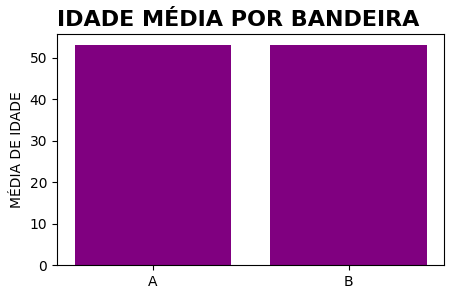

In [18]:
# DATA VIZ.
fig = plt.figure(figsize=(5,3));
plt.bar(mean_age_flag['bandeira'], mean_age_flag['idade'], color='purple');
plt.ylabel("MÉDIA DE IDADE");
plt.title("IDADE MÉDIA POR BANDEIRA", loc='left', fontsize=16, fontweight='bold');

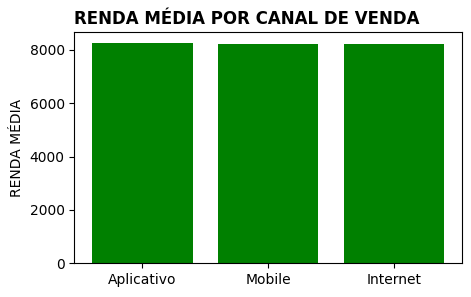

In [19]:
fig = plt.figure(figsize=(5,3));
plt.bar(group_canal_renda['idcanalvenda'], group_canal_renda['renda'], color='green');
plt.ylabel("RENDA MÉDIA");
plt.title("RENDA MÉDIA POR CANAL DE VENDA", loc='left', fontsize=12, fontweight='bold');

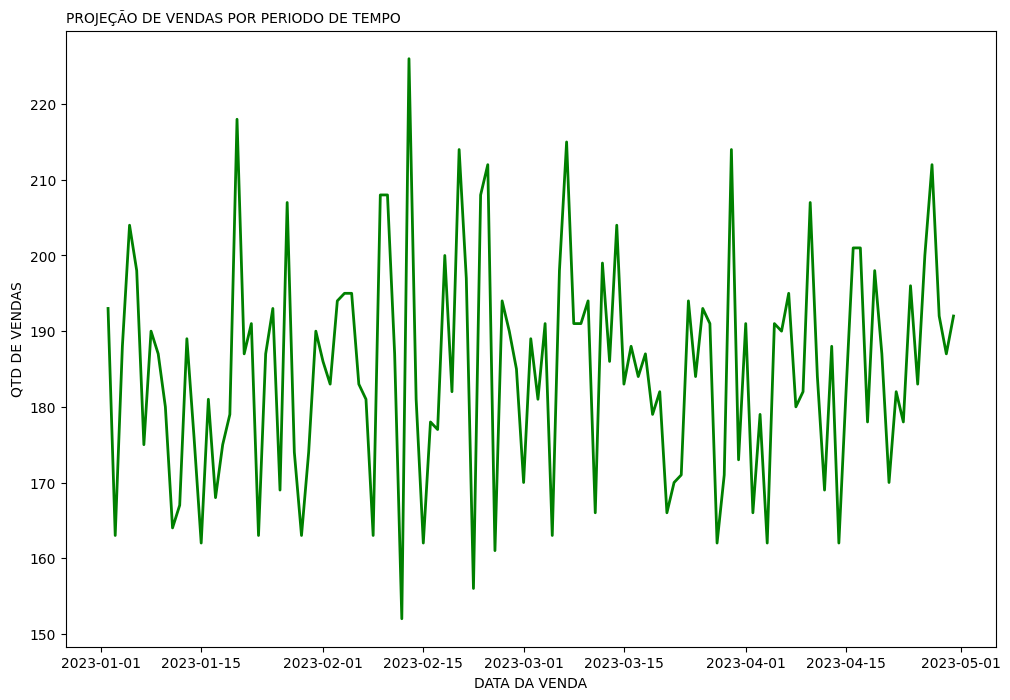

In [20]:
datesales = rprice.groupby("Data").idcompra.nunique().reset_index()
fig = plt.figure(figsize=(12,8))

plt.xlabel("DATA DA VENDA")
plt.ylabel("QTD DE VENDAS")
plt.title("PROJEÇÃO DE VENDAS POR PERIODO DE TEMPO", loc="left", fontsize=10)
x = datesales['Data']
y = datesales['idcompra']
plt.plot(x,y,color = 'green', linewidth=2)
plt.show();

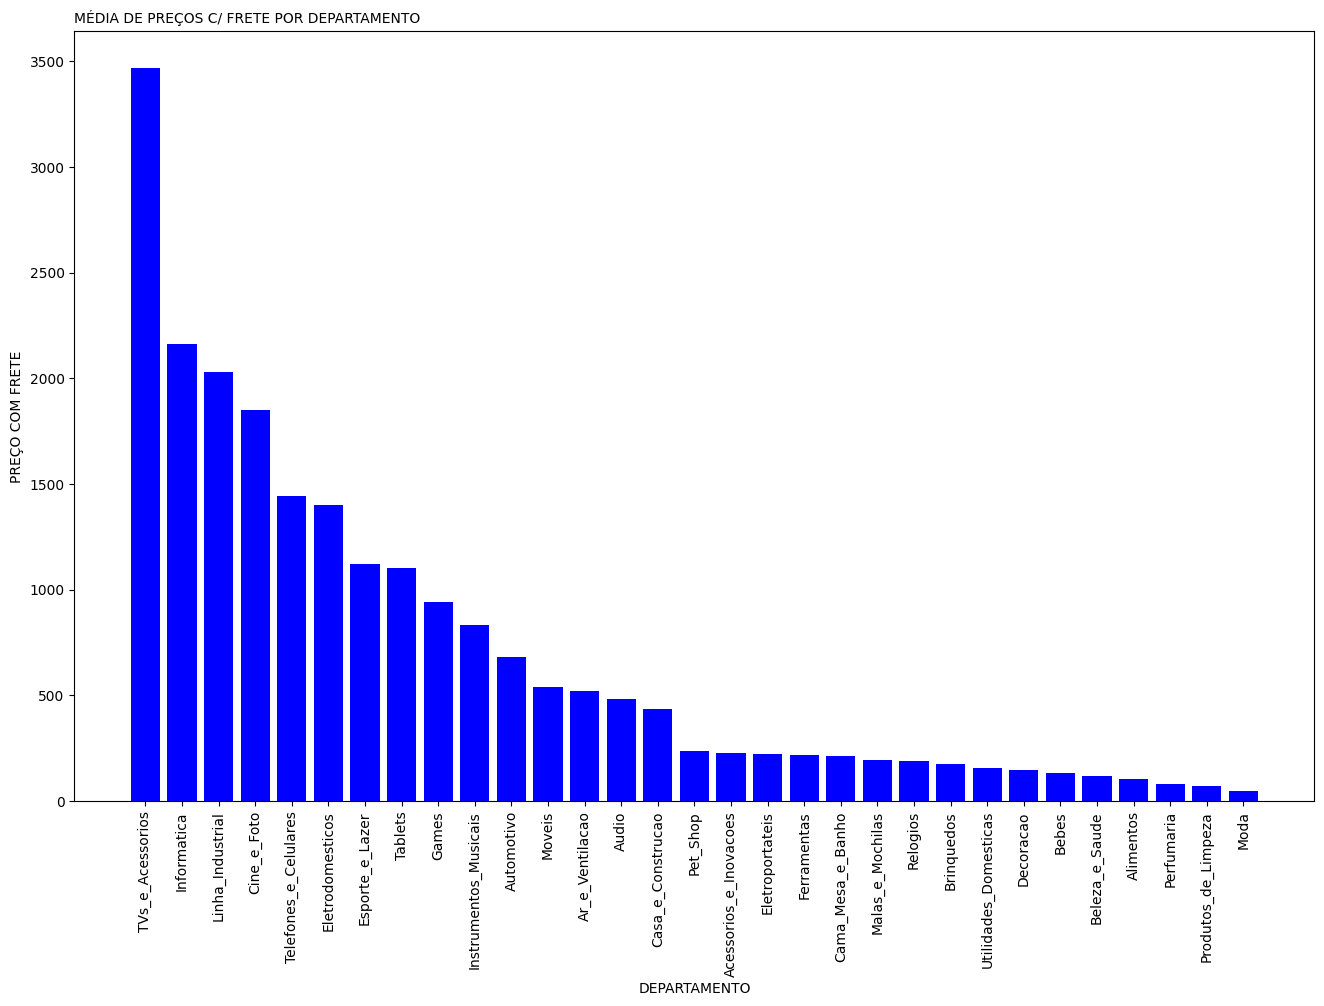

In [21]:
departsales = round(rprice.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 4)

fig = plt.figure(figsize=(16,10))

plt.xlabel("DEPARTAMENTO")
plt.ylabel("PREÇO COM FRETE")
plt.title("MÉDIA DE PREÇOS C/ FRETE POR DEPARTAMENTO", loc="left", fontsize=10)
x = departsales['Nome_Departamento']
y = departsales['Preço_com_frete']
plt.bar(x,y,color = 'blue', linewidth=2)
plt.xticks(rotation=90)
plt.show();

In [22]:
px.bar(mean_age_flag, x='bandeira', y='idade') #utilizando a plotly para plotar os gráficos anteriores.

In [23]:
x = datesales['Data']
y = datesales['idcompra']
px.line(datesales,x=x,y=y, title='PROJEÇÃO DE VENDAS POR PERIODO DE TEMPO')

In [26]:
fig = px.bar(departsales, x='Nome_Departamento', y='Preço_com_frete', title='PREÇOS COM FRETE POR DEPARTAMENTO')
fig.update_xaxes(tickangle=90)
fig.show();